# 1. 결정트리 개념 정리
- 입력값과 출력값의 관계를 나무 모양으로 모델링하는 지도학습 기법
- 분류 트리와 회귀 트리로 구분됨.


### 주요 알고리즘
- ID3 : 분류문제에만 적용 가능. 모든 피처는 범주형이어야 함.
    - 분기 규칙 : 정보 이득 최대화
- C4.5 : ID3에서 발전됨.
    - 피처 범주형 제약 사라짐(숫자형 변수 여러 구간으로 분할_
    - 학습한 트리를 if-then 규칙의 집합으로 변환하는 과정 추가
    - 정확도 계산함. 전체 정확도가 증가하는 방향으로 일부 규칙 제거.
    - 분기 규칙 : 정보 이득 최대화
- CART : C4.5와 비슷하나 회귀모델이 추가됨. if-then 규칙 집합도 제공 안 함.
    - 분류 : 지니 불순도 최소화
    - 회귀 : MSE 최소화
- CHAID : 통계 검정 기반으로 분기 수행
    - 분류 : 카이제곱 검정
    - 회귀 : F 검정
    
    
### 결정트리 패키지
- sklearn.tree.DecisionTreeClassifier() 클래스
- 하이퍼파라미터
    - criterion : 분기 규칙 선택
        - gini : 지니 불순도 최소화 (디폴트값)
        - entropy : 정보 이득 최대화
    - max_depth : 트리 깊이 상한선(1 이상의 정수)
        - None : 최대 깊이 제한 없음.(디폴트값)
            - 과적합에 주의할 것
    - min_samples_split : 노드에서 분기를 진행하는 최소한의 샘플 숫자 선택(0을 초과하는 int OR float)
        - 디폴트값 : 2
    - min_samples_leaf : 리프 노드에 있을 샘플 개수 최소값 선택. 주로 과적합 방지 용도.
        - 디폴트값 : 1
    - max_features : 각 노드에서 분기 확인을 위한 피처 수.
        - None(디폴트값) : p개 전체 확인
        - int
        - float
        - sqrt
        - log2
        - 단 하나의 분기 규칙도 못 찾을 경우, 지정값을 넘어서도 계속 확인함에 유의할 것.
    - random_state : 랜덤성 제어
        - 디폴트값 : None
    - class_weight : 클래스 라벨별 가중치 설정
        - None(디폴트값) : 모든 클래스에 같은 가중치 설정
        - dict : 사용자 설정 가중치 설정
        - 'balanced' : 클래스의 비율에 반비례한 가중치 설정
    - ccp_alpha : 가지치기 알고리즘의 복잡도 하이퍼파라미터. 과적합 방지용
        - 디폴트값 : 0(가지치기 하지 않음.)
        


### 장점
- 많은 전처리를 필요로 하지 않음.
    - 스케일링, 변환 등에 결과 안 바뀜.
- 시간복잡도가 높지 않음.
    - 큰 데이터셋에 적용 가능.
- 다중공선성에 강함.
    - 각 노드에서 피처별로 지니 불순도나 정보 이득만을 계산하여 분기를 택하므로.
    - 다중공선성 있는 두 피처가 있으면 둘 중 하나만 최종 선택함.
- 모든 불리언 함수를 근사할 수 있음.

### 단점
- 과적합에 취약함
    - 그래서 가지치기 매커니즘이 개발됨.
- 노이즈에 강건하지 않음.
    - 학습 데이터 작은 변화 -> 학습 결과 큰 변화

## 2. 결정트리 코드 실습
- 1) DecisionTreeClassifier() 클래스 사용
    - 분류 모델링

- 2) 그리드 서치 사용
    - 최적의 하이퍼파라미터 조합 찾기-> 튜닝

## 1) DecisionTreeClassifier() 클래스 사용
- 분류 모델링 수행

In [1]:
# 사용할 패키지들
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes # 당뇨 데이터
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 데이터 분리
X, y = load_diabetes(return_X_y = True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.33, 
                                                   random_state = 1234)

In [3]:
# 모델 튜닝 및 데이터 학습
clf = DecisionTreeClassifier(criterion = 'entropy', # 정보 이득 최대화
                            max_depth = 10, # 최대 깊이
                            min_samples_split = 3, # 노드 샘플 개수 3 이상일 때만 분기
                            random_state = 1234)
clf = clf.fit(X_train, y_train)

[Text(0.490070564516129, 0.95, 'X[2] <= -0.01\nentropy = 7.285\nsamples = 296\nvalue = [1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 4, 3, 1, 4\n1, 3, 2, 2, 2, 2, 3, 2, 1, 2, 2, 1, 3, 5\n1, 1, 2, 2, 2, 1, 1, 2, 3, 2, 1, 3, 2, 5\n2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 4, 2, 1\n2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2\n2, 4, 1, 2, 2, 1, 2, 2, 2, 2, 3, 1, 3, 1\n1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2\n1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1\n2, 1, 1, 1, 2, 3, 1, 5, 2, 2, 1, 1, 3, 1\n1, 1, 1, 3, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1\n1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1\n1, 3, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.21118951612903225, 0.85, 'X[8] <= -0.028\nentropy = 6.389\nsamples = 144\nvalue = [0, 1, 1, 3, 1, 0, 2, 0, 1, 2, 1, 3, 1, 3\n1, 2, 1, 1, 2, 2, 3, 2, 0, 1, 2, 0, 3, 5\n0, 1, 2, 2, 1, 1, 1, 0, 3, 1, 1, 2, 2, 3\n2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 4, 1, 1\n0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1\n0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1\n0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2,

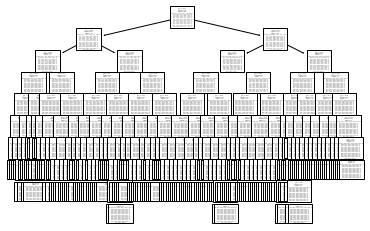

In [4]:
# 결정트리 구조 시각화
from sklearn import tree

tree.plot_tree(clf)

In [5]:
# 라벨 예측 및 정확도 계산
y_pred = clf.predict(X_test)

acc = (y_pred == y_test).sum() / len(y_test)
print(f'정확도 : {acc * 100 : 2f}%')

정확도 :  0.684932%


### 결과 정리
- 정보 이득 최대화시, 예측 정확도 0.6849
- 결정트리 구조를 보아하니 하이퍼파라미터 재조정이 필요한듯 싶다.

### criterion, min_samples_split 값을 디폴트로 설정해보자

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
# 데이터 분리
X, y = load_diabetes(return_X_y = True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.33, 
                                                   random_state = 1234)

In [8]:
# 모델 튜닝 및 데이터 학습
clf = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 1234)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=1234)

[Text(0.6538461538461539, 0.9166666666666666, 'X[8] <= -0.031\ngini = 0.993\nsamples = 296\nvalue = [1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 4, 3, 1, 4\n1, 3, 2, 2, 2, 2, 3, 2, 1, 2, 2, 1, 3, 5\n1, 1, 2, 2, 2, 1, 1, 2, 3, 2, 1, 3, 2, 5\n2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 4, 2, 1\n2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2\n2, 4, 1, 2, 2, 1, 2, 2, 2, 2, 3, 1, 3, 1\n1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2\n1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1\n2, 1, 1, 1, 2, 3, 1, 5, 2, 2, 1, 1, 3, 1\n1, 1, 1, 3, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1\n1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1\n1, 3, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.5769230769230769, 0.75, 'X[2] <= -0.039\ngini = 0.975\nsamples = 77\nvalue = [1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 0, 0, 4\n0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 5\n0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2\n0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1\n0, 0, 0, 3, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0\n0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

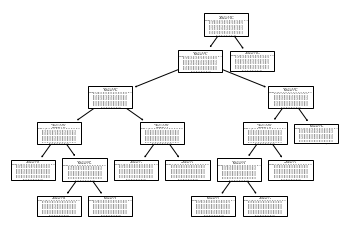

In [9]:
# 결정트리 구조 시각화
from sklearn import tree

tree.plot_tree(clf)

In [10]:
# 라벨 예측 및 정확도 확인
y_pred = clf.predict(X_test)
acc = (y_test == y_pred).sum() / len(y_test)
print(f'정확도 : {acc*100 : .2f}%')

정확도 :  0.00%


### 결과 정리
- 디폴트값으로 돌리면 오히려 예측 정확도가 박살남.

## 2) 그리드 서치 사용
- 그리드 서치로 하이퍼파라미터 튜닝
    - 각 하이퍼파라미터 조합 탐색 -> 최고의 성능을 내는 조합 선택

### 하이퍼파라미터 정리
- criterion
    - squared error(디폴트값) : MSE 기준
    - friedman_mse : MSE 기준 개선
    - absolute_error : MAE 기준
    - poisson : 푸아송 편차 절반 기준
- 나머지는 DecisionTreeClassifier() 클래스와 동일

In [12]:
# 데이터 분리
X, y = load_diabetes(return_X_y = True, as_frame = False)

## train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.33, 
                                                   random_state = 1234)
## train / val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                   test_size = 0.33, 
                                                   random_state = 1234)

In [23]:
# 그리드 서치
max_depths = [None, 3, 6]
min_samples_splits = [2, 3, 4]
max_featuress = ['sqrt', 'log2', None]

In [25]:
from itertools import product

best_max_depth = None
best_min_samples_split = None
best_max_features = None

best_acc = 0

for max_depth, min_samples_split, max_features in product(max_depths, min_samples_splits, max_featuress) :
    clf = DecisionTreeClassifier(random_state = 1234, 
                                max_depth = max_depth,
                                min_samples_split = min_samples_split,
                                max_features = max_features)
    y_pred = clf.fit(X_train, y_train).predict(X_val)
    
    acc = (y_pred == y_val).mean()
    if acc > best_acc :
        best_acc = acc
        best_max_depth = max_depth
        best_min_samples_split = min_samples_split
        best_max_features = max_features
        
print('max_depth : ', best_max_depth, 
      '\nmin_samples_split : ', best_min_samples_split, 
      '\nmax_features :', best_max_features)

max_depth :  3 
min_samples_split :  2 
max_features : None


### 그리드 서치로 최선의 하이퍼파라미터 조합을 찾았다.

In [26]:
# 그렇다면 최적의 하이퍼파라미터 조합 사용시 정확도는?

clf = DecisionTreeClassifier(random_state = 1234, 
                            max_depth = best_max_depth,
                            min_samples_split = best_min_samples_split,
                            max_features = best_max_features)

y_pred = clf.fit(X_train, y_train).predict(X_test)
print(f'정확도 :{(y_pred == y_test).mean() * 100 : .2f}%')

정확도 : 0.68%
